In [27]:
# setup & dependencies
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

base_url="https://api.rawg.io/api/"

In [30]:
# File to Load (Remember to Change These)
game_path = "csvfiles/game_platform.csv"

# Read Purchasing File and store into Pandas data frame
platform_data = pd.read_csv(game_path)
platform_data

,name,rating count,number of games,avg rating
0,PC,201283,1096,3.865797
1,PlayStation,191222,769,3.921767
2,Xbox,164493,631,3.884060
3,iOS,31104,202,3.829536
4,Android,20665,125,3.819441
5,Apple Macintosh,72376,488,3.832501
6,Linux,54190,331,3.867476
7,Nintendo,82521,425,3.998118
8,Atari,0,0,NaN
9,Commodore / Amiga,0,0,NaN


In [34]:
# Remove platforms with no ratings
gaming_platforms = platform_data.dropna(how="any")
gaming_platforms

,name,rating count,number of games,avg rating
0,PC,201283,1096,3.865797
1,PlayStation,191222,769,3.921767
2,Xbox,164493,631,3.884060
3,iOS,31104,202,3.829536
4,Android,20665,125,3.819441
5,Apple Macintosh,72376,488,3.832501
6,Linux,54190,331,3.867476
7,Nintendo,82521,425,3.998118
13,Web,2905,5,3.849425


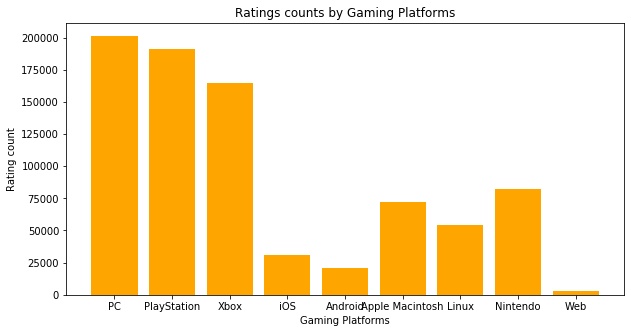

In [35]:
# Bar Graph for Rating Counts by Gaming Platforms
plt.figure(figsize=(10,5))
plt.bar(gaming_platforms["name"], gaming_platforms["rating count"], color='orange')
plt.title('Ratings counts by Gaming Platforms')
plt.xlabel('Gaming Platforms')
plt.ylabel('Rating count')

plt.savefig("figures/platforms_rating_count.png")

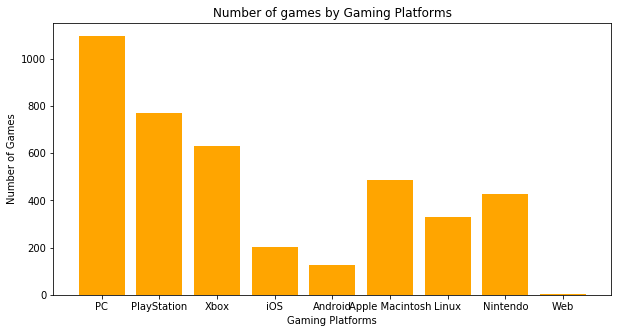

In [36]:
plt.figure(figsize=(10,5))
plt.bar(gaming_platforms["name"], gaming_platforms["number of games"], color='orange')
plt.title('Number of games by Gaming Platforms')
plt.xlabel('Gaming Platforms')
plt.ylabel('Number of Games')
plt.savefig("figures/total_games_platform.png")

Observations: PC is the most popular platform with the most number of games and rating counts. We can see games are rated significantly more on PC, PlayStation and Xbox platforms than other platforms.   

In [111]:
games_path = "csvfiles/game_final.csv"
games_data = pd.read_csv(games_path)
games_data.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,metacritic score,yet,owned,beaten,toplay,dropped,playing,users,month,year
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,93,562,6149,2405,455,424,593,9147,5,2015
1,Life is Strange,3439,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,83,466,6156,1916,184,343,124,8196,1,2015
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,96,404,4230,1261,1143,219,588,6079,10,2018
3,DOOM (2016),2454,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,85,318,4868,1526,319,370,222,6616,5,2016
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,84,295,4844,1235,225,732,222,6301,11,2015


Platforms is stored as string, create sparse matrix for games platforms.
Assumptions: Game are hosted on multiple platforms

In [112]:
# assign games data to new dataframe
plat_type_df = games_data
plat_type_df["s_platforms"]=""

# # Remove columns data that is not needed
# plat_type_df = plat_type_df.drop(columns=['number of stores', 'stores', 'number of genres', 'genres', 'tags', 'month', 'release date', 'platforms'])

# Remove unwanted characters in platforms data
remove_chars = ['[', ']', "'"] 
new_platforms_str = list()

for i in plat_type_df.index:
    
    #get len of string
    platform_len = len(plat_type_df.loc[i, "platforms"])
    platform_str = plat_type_df.loc[i, "platforms"]

    platform_str = ''.join(i for i in platform_str if not i in remove_chars) 
    
    new_platforms_str.append(platform_str)
    
plat_type_df["s_platforms"] = new_platforms_str
plat_type_df.head()

,name,id,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,...,yet,owned,beaten,toplay,dropped,playing,users,month,year,s_platforms
0,The Witcher 3: Wild Hunt,3328,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,...,562,6149,2405,455,424,593,9147,5,2015,"PC, PlayStation, Xbox, Nintendo"
1,Life is Strange,3439,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,...,466,6156,1916,184,343,124,8196,1,2015,"PC, PlayStation, Xbox, iOS, Android, Apple Mac..."
2,Red Dead Redemption 2,28,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Adventure', 'Action']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,...,404,4230,1261,1143,219,588,6079,10,2018,"PC, PlayStation, Xbox"
3,DOOM (2016),2454,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,...,318,4868,1526,319,370,222,6616,5,2016,"PC, PlayStation, Xbox, Nintendo"
4,Fallout 4,3070,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,...,295,4844,1235,225,732,222,6301,11,2015,"PC, PlayStation, Xbox"


In [113]:
# Split the string into list
plat_type_df["platforms_split"] = plat_type_df["s_platforms"].astype(str).str.split(",")
# Convert platform list into dataframe
split_platforms_df = plat_type_df["platforms_split"].apply(pd.Series)

# Rename data frame columns
platform_columns = dict()

for column in split_platforms_df.columns:
  platform_columns[column] = f"platform_{int(column)+1}"

split_platforms_df = split_platforms_df.rename(columns = platform_columns)

# Join dataframe to the game name
split_platforms_df = plat_type_df[["name"]].join(split_platforms_df)

# Melt many coloumns into few columns
all_platforms_df = pd.melt(split_platforms_df, id_vars="name").sort_values(["name", "variable"])

# Drop column name to assign variable to game name
all_platforms_df = all_platforms_df.drop(columns="variable")
all_platforms_df = all_platforms_df.dropna(how="any")
all_platforms_df.head()

,name,value
1028,0RBITALIS,PC
2216,0RBITALIS,Apple Macintosh
337,12 is Better Than 6,PC
1525,12 is Better Than 6,Apple Macintosh
2713,12 is Better Than 6,Linux


In [109]:
# Convert the platform values to sparse Matrix
plat_matrix_df = all_platforms_df[["name"]].join(pd.get_dummies(all_platforms_df["value"]))

# Aggregate total games per platforms
plat_matrix_df = plat_matrix_df.groupby("name").sum()
plat_matrix_df.head()

,Android,Apple Macintosh,Linux,Nintendo,PlayStation,Web,Xbox,iOS,Nintendo,PC,PlayStation,Xbox,iOS
name,,,,,,,,,,,,,
0RBITALIS,0,1,0,0,0,0,0,0,0,1,0,0,0
12 is Better Than 6,0,1,1,1,0,0,0,0,0,1,0,0,0
1979 Revolution: Black Friday,1,1,0,1,1,0,1,0,0,1,0,0,0
428: Shibuya Scramble,1,0,0,1,1,0,0,1,0,1,0,0,0
7th Sector,0,0,0,1,1,0,1,0,0,1,0,0,0


In [114]:
# Rename columns names for remove duplicate columns
plat_matrix_df = plat_matrix_df.rename(columns = {' Android': 'Andriod', ' Apple Macintosh':'Apple Macintosh'})
plat_matrix_df = plat_matrix_df.rename(columns = {' Nintendo': 'Nintendo', ' PlayStation':'PlayStation'})
plat_matrix_df = plat_matrix_df.rename(columns = {' Web': 'Web', ' Xbox':'Xbox', ' iOS': 'iOS' })
plat_matrix_df = plat_matrix_df.rename(columns = {' Linux': 'Linux'})

# Combine duplicate platforms
plat_matrix_df = plat_matrix_df.groupby(plat_matrix_df.columns, axis=1).sum()
plat_matrix_df.head()

,Andriod,Apple Macintosh,Linux,Nintendo,PC,PlayStation,Web,Xbox,iOS
name,,,,,,,,,
0RBITALIS,0,1,0,0,1,0,0,0,0
12 is Better Than 6,0,1,1,1,1,0,0,0,0
1979 Revolution: Black Friday,1,1,0,1,1,1,0,1,0
428: Shibuya Scramble,1,0,0,1,1,1,0,0,1
7th Sector,0,0,0,1,1,1,0,1,0


In [122]:
# Merge dataframe with games dataframe 
combined_plat_df = pd.merge(plat_matrix_df, plat_type_df, on="name")
# Remove columns data that is not needed
combined_plat_df = combined_plat_df.drop(columns=['platforms_split'])
combined_plat_df.head()

# Calculate total number of platforms
combined_plat_df["number of platforms"].max()
total_plat_df = combined_plat_df[["name", "Linux", "Andriod", "Apple Macintosh", "Nintendo", "PC", "PlayStation", "Web", "Xbox", "iOS"]]

# Get the total number of platforms for each game
total_platforms = total_plat_df.sum(axis=1)
total_platforms
combined_plat_df["total platforms"] = total_platforms
combined_plat_df.head()

,name,Andriod,Apple Macintosh,Linux,Nintendo,PC,PlayStation,Web,Xbox,iOS,...,owned,beaten,toplay,dropped,playing,users,month,year,s_platforms,total platforms
0,0RBITALIS,0,1,0,0,1,0,0,0,0,...,107,1,0,1,0,108,5,2015,"PC, Apple Macintosh",2
1,12 is Better Than 6,0,1,1,1,1,0,0,0,0,...,889,47,17,40,2,938,11,2015,"PC, Apple Macintosh, Linux, Nintendo",4
2,1979 Revolution: Black Friday,1,1,0,1,1,1,0,1,0,...,164,27,13,7,0,191,4,2016,"PC, PlayStation, Xbox, Android, Apple Macintos...",6
3,428: Shibuya Scramble,1,0,0,1,1,1,0,0,1,...,97,13,12,3,7,117,9,2018,"PC, PlayStation, iOS, Android, Nintendo",5
4,7th Sector,0,0,0,1,1,1,0,1,0,...,89,7,10,8,1,97,3,2019,"PC, PlayStation, Xbox, Nintendo",4


In [123]:
# Group rating score by number of platforms
platforms_total_df = combined_plat_df.groupby(combined_plat_df["rating"]).sum()
platforms_total_df = platforms_total_df[["Linux", "Andriod", "Apple Macintosh", "Nintendo", "PC", "PlayStation", "Web", "Xbox", "iOS"]]

# Make Rating a column instead of index
platforms_total_df["rating"] = platforms_total_df.index
platforms_total_df["rating"].astype(float)

# Reset index and reorder columns
platforms_total_df= platforms_total_df.reset_index(drop=True)
platforms_total_df = platforms_total_df[["rating", "Linux", "Andriod", "Apple Macintosh", "Nintendo", "PC", "PlayStation", "Web", "Xbox", "iOS"]]
platforms_total_df.head()

,rating,Linux,Andriod,Apple Macintosh,Nintendo,PC,PlayStation,Web,Xbox,iOS
0,1.29,0,0,0,0,1,0,0,0,0
1,1.50,0,0,0,0,1,0,0,0,0
2,1.67,0,0,1,1,1,0,0,0,0
3,1.68,0,1,1,0,1,0,0,0,1
4,1.73,0,0,1,0,1,1,0,1,0


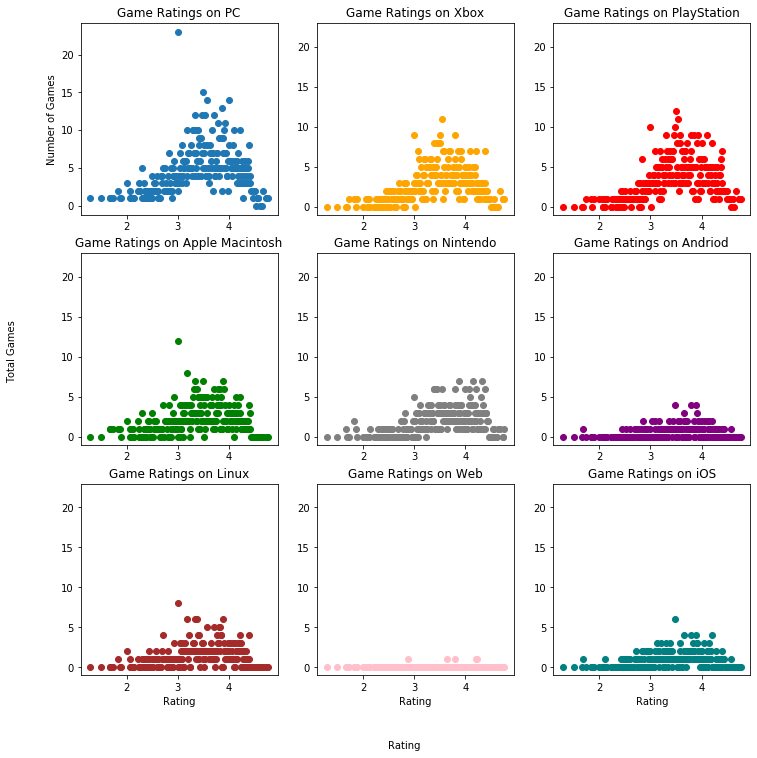

In [124]:
# Charts to analyse any trends between games and ratings on each platform
fig1, axs = plt.subplots(3, 3, figsize=(12,12))
axs[0,0].scatter(platforms_total_df["rating"], platforms_total_df["PC"])
axs[0,1].scatter(platforms_total_df["rating"], platforms_total_df["Xbox"], color="orange")  
axs[0,2].scatter(platforms_total_df["rating"], platforms_total_df["PlayStation"], color="red") 
axs[1,0].scatter(platforms_total_df["rating"], platforms_total_df["Apple Macintosh"], color="green") 
axs[1,1].scatter(platforms_total_df["rating"], platforms_total_df["Nintendo"], color="grey") 
axs[1,2].scatter(platforms_total_df["rating"], platforms_total_df["Andriod"], color="purple") 
axs[2,0].scatter(platforms_total_df["rating"], platforms_total_df["Linux"], color="brown") 
axs[2,1].scatter(platforms_total_df["rating"], platforms_total_df["Web"], color="pink") 
axs[2,2].scatter(platforms_total_df["rating"], platforms_total_df["iOS"], color="teal") 

axs[0,0].set_title("Game Ratings on PC")
axs[0,0].set_ylabel("Number of Games")

axs[0,1].set_title("Game Ratings on Xbox")
# axs[0,1].set_xlabel("Rating")
axs[0,1].set_ylim([-1, 23])

axs[0,2].set_title("Game Ratings on PlayStation")
# axs[0,2].set_xlabel("Rating")
axs[0,2].set_ylim([-1, 23])

axs[1,0].set_title("Game Ratings on Apple Macintosh")
# axs[1,0].set_xlabel("Rating")
axs[1,0].set_ylim([-1, 23])

axs[1,1].set_title("Game Ratings on Nintendo")
# axs[1,1].set_xlabel("Rating")
axs[1,1].set_ylim([-1, 23])

axs[1,2].set_title("Game Ratings on Andriod")
# axs[1,2].set_xlabel("Rating")
axs[1,2].set_ylim([-1, 23])

axs[2,0].set_title("Game Ratings on Linux")
axs[2,0].set_xlabel("Rating")
axs[2,0].set_ylim([-1, 23])

axs[2,1].set_title("Game Ratings on Web")
axs[2,1].set_xlabel("Rating")
axs[2,1].set_ylim([-1, 23])

axs[2,2].set_title("Game Ratings on iOS")
axs[2,2].set_xlabel("Rating")
axs[2,2].set_ylim([-1, 23])

fig1.text(0.5, 0.04, 'Rating', ha='center')
fig1.text(0.04, 0.5, 'Total Games', va='center', rotation='vertical')

plt.savefig("figures/game_ratings_platform.png")

Observations:  1.  The 3 most popular platforms are PC, Xbox and Playstation with the most highly rated games. 
               2.  There are more highly rated games on the top 3 game platforms.

In [127]:
# Get the average number of platforms based on games ratings
average_platforms_df = combined_plat_df.groupby(["rating"]).mean()

# Make rating a column instead of index
average_platforms_df["rating"] = average_platforms_df.index

# Reset index and reorder columns
average_platforms_df = average_platforms_df.reset_index(drop=True)
platforms_rating_df = average_platforms_df[["rating","total platforms"]]

platforms_rating_df.head()

,rating,total platforms
0,1.29,1.0
1,1.50,1.0
2,1.67,3.0
3,1.68,4.0
4,1.73,4.0


In [128]:
# Calculate the correlation coefficient and linear regression model 
# Calculate the correlation coefficient
rating = platforms_rating_df["rating"]
platforms = platforms_rating_df["total platforms"]
correlation = st.pearsonr(platforms, rating,)
print(f"The correlation ratings and number of platforms is {round(correlation[0],2)}")

The correlation ratings and number of platforms is 0.12


In [129]:
#Calculate the linear regresssion 
slope, intercept, rvalue, pvalue, stderr = st.linregress(platforms, rating)
print("slope", slope)
print("intercept", intercept)
print("coefficient", rvalue)

rating_platforms_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(rating_platforms_eq)
rating_platforms_regression = platforms * slope + intercept
rating_platforms_regression.head()

slope 0.09985682139128926
intercept 3.0196092054390853
coefficient 0.11807752771369885
y = 0.1x +3.02


0    3.119466
1    3.119466
2    3.319180
3    3.419036
4    3.419036
Name: total platforms, dtype: float64

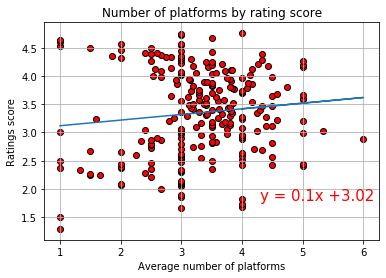

In [135]:
# Visualise average ratings on number of platforms.
# Plot the linear model on top of scatter plot 
plt.scatter(platforms_rating_df["total platforms"], platforms_rating_df["rating"],facecolors="red", edgecolors="black") 
plt.plot(platforms, rating_platforms_regression)

plt.title("Number of platforms by rating score")
plt.xlabel("Average number of platforms")
plt.ylabel("Ratings score")
plt.grid()
plt.annotate(rating_platforms_eq,(4.3,1.8),fontsize=15,color="red")
# plt.xlim(14.5, 25.5)
# plt.ylim(33.5, 47)

plt.savefig("figures/rating_platform_scatter.png")

Observations:  1.There is weak correlation between ratings score and number of platforms.                                                      2.The number of platforms games are hosted on does not strongly affect the ratings score.
               3.Most games are hosted on 3 to 4 platforms

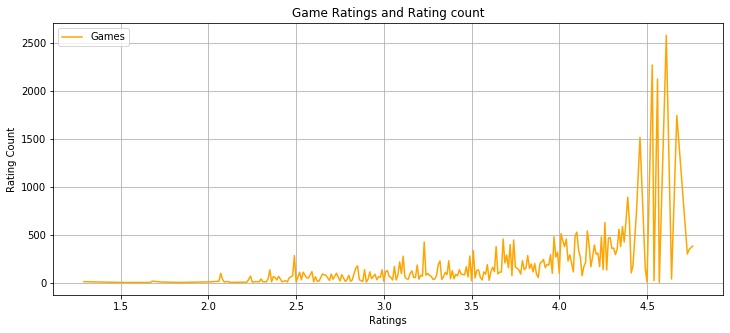

In [142]:
# Visualise rating score and rating counts
plt.figure(figsize=(12,5))
plt.plot(average_platforms_df["rating"], average_platforms_df["rating count"], color='orange', label="Games")

plt.title('Game Ratings and Rating count')
plt.ylabel('Rating Count')
plt.xlabel('Ratings')
plt.legend(loc="best")
plt.grid()

plt.savefig("figures/gamerating_count.png")
plt.show()

Observations: Popular game ratings have higher user rating counts